# IMPORT LIBRARIES

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import opendatasets as od

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.naive_bayes import MultinomialNB

In [10]:
import pickle


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
import tensorflow as tf

In [13]:

from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten

In [14]:
from keras.models import Sequential

In [15]:
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:

from sklearn.metrics import accuracy_score

In [18]:

from sklearn.metrics import classification_report

In [19]:
import nltk

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [21]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [22]:
from nltk.stem import WordNetLemmatizer


In [23]:
from nltk.corpus import stopwords

In [24]:
import re

In [25]:
import os

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
# Importing the Embedding Layer from keras layers
from tensorflow.keras.layers import Embedding

In [29]:
from keras.preprocessing.text import Tokenizer

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score


# DOWNLOADING THE DATASET

In [113]:
od.download("https://www.kaggle.com/competitions/nlp-getting-started/data")

Skipping, found downloaded files in "./nlp-getting-started" (use force=True to force download)


In [132]:
data_train = pd.read_csv("nlp-getting-started/train.csv")

In [215]:
data_test = pd.read_csv("nlp-getting-started/test.csv")

In [216]:
print(data_train.head())

                                                text  target
0         deed reason earthquake may allah forgive u       1
1              forest fire near la ronge sask canada       1
2  resident asked shelter place notified officer ...       1
3  13 000 people receive wildfire evacuation orde...       1
4  got sent photo ruby alaska smoke wildfire pour...       1


In [217]:
print(data_train.tail())

                                                   text  target
7608  two giant crane holding bridge collapse nearby...       1
7609  aria_ahrary thetawniest control wild fire cali...       1
7610  m1 94 01 04 utc 5km volcano hawaii http co zdt...       1
7611  police investigating e bike collided car littl...       1
7612  latest home razed northern california wildfire...       1


In [218]:
print(data_test.head())

   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [219]:
print(data_test.tail())

         id keyword location  \
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
3261  MEG issues Hazardous Weather Outlook (HWO) htt...  
3262  #CityofCalgary has activated its Municipal Eme...  


# Selecting the Required Columns i.e. Selecting the Text and the Target Column

In [220]:
data_train  = data_train[["text", "target"]]

In [221]:
data_test = data_test[["text"]]

In [222]:
data_train.head()

,text,target
0,deed reason earthquake may allah forgive u,1
1,forest fire near la ronge sask canada,1
2,resident asked shelter place notified officer ...,1
3,13 000 people receive wildfire evacuation orde...,1
4,got sent photo ruby alaska smoke wildfire pour...,1


In [223]:
data_test.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


# DATA PREPROCESSING

In [141]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB
None


In [142]:
print(data_train.isnull().sum())

text      0
target    0
dtype: int64


In [143]:
print(data_train.describe())

           target
count  7613.00000
mean      0.42966
std       0.49506
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000
max       1.00000


In [144]:
print(data_train.dtypes)

text      object
target     int64
dtype: object


In [145]:
# Lowering all the Sentences in the Data
data_train["text"] = data_train["text"].apply(lambda x: x.lower())

In [146]:
data_train.head()

,text,target
0,our deeds are the reason of this #earthquake m...,1
1,forest fire near la ronge sask. canada,1
2,all residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,just got sent this photo from ruby #alaska as ...,1


In [147]:
# Removing the Puntuation marks from the text

data_train["text"] = data_train["text"].str.replace(r'[^\w\s]+', ' ').str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [148]:
data_train.head()

,text,target
0,our deeds are the reason of this earthquake m...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are ...,1
3,13 000 people receive wildfires evacuation or...,1
4,just got sent this photo from ruby alaska as ...,1


In [149]:
# Removing the URL's from the data

data_train["text"] = data_train["text"].str.replace(r'/s*https?:///S+(/s+|$)', '').str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [150]:
# Removing the Stop Words From the Text Column

nltk.download('stopwords')

stop = set(stopwords.words("english"))


def remove_stopwords(text):
  filtered_words =  [word.lower() for word in text.split() if word.lower() not in stop]
  return " ".join(filtered_words)


data_train["text"] = data_train["text"].map(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
# Expanding the Contractions 

# In the next step, we expand all the contraction, contraction means replacing the appostrophe and 
# expanding the sentence like aren't is expanded and replaced with are not
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)
# Usage
replace_contractions("this's a text with contraction")

data_train["text"] = data_train["text"].apply(lambda x: replace_contractions(x))


In [152]:
# Remove any Numeric Values from the Text Column in pandas data frame

data_train["text"] = data_train["text"].str.replace('/d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [153]:
data_train.head()

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,13 000 people receive wildfires evacuation ord...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


In [154]:

# Apply Lemamtization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data_train["text"] = data_train["text"].apply(lambda text: lemmatize_words(text))
data_train.head()

,text,target
0,deed reason earthquake may allah forgive u,1
1,forest fire near la ronge sask canada,1
2,resident asked shelter place notified officer ...,1
3,13 000 people receive wildfire evacuation orde...,1
4,got sent photo ruby alaska smoke wildfire pour...,1


In [155]:
print(data_train.head())

                                                text  target
0         deed reason earthquake may allah forgive u       1
1              forest fire near la ronge sask canada       1
2  resident asked shelter place notified officer ...       1
3  13 000 people receive wildfire evacuation orde...       1
4  got sent photo ruby alaska smoke wildfire pour...       1


# Data Preprocessing of the Test Dataset

In [224]:
data_test.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [225]:
# Lowering all the Sentences in the Data
data_test["text"] = data_test["text"].apply(lambda x: x.lower())

In [226]:
# Removing the Puntuation marks from the text

data_test["text"] = data_test["text"].str.replace(r'[^\w\s]+', ' ').str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [227]:
# Removing the URL's from the data

data_test["text"] = data_test["text"].str.replace(r'/s*https?:///S+(/s+|$)', '').str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [228]:
# Removing the Stop Words From the Text Column

nltk.download('stopwords')

stop = set(stopwords.words("english"))


def remove_stopwords(text):
  filtered_words =  [word.lower() for word in text.split() if word.lower() not in stop]
  return " ".join(filtered_words)


data_test["text"] = data_test["text"].map(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [229]:
# Expanding the Contractions 

# In the next step, we expand all the contraction, contraction means replacing the appostrophe and 
# expanding the sentence like aren't is expanded and replaced with are not
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)
# Usage
replace_contractions("this's a text with contraction")

data_test["text"] = data_test["text"].apply(lambda x: replace_contractions(x))


In [230]:
# Remove any Numeric Values from the Text Column in pandas data frame

data_test["text"] = data_test["text"].str.replace('/d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [231]:
# Apply Lemamtization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data_test["text"] = data_test["text"].apply(lambda text: lemmatize_words(text))


In [232]:
print(data_test.head())

                                                text
0                        happened terrible car crash
1  heard earthquake different city stay safe ever...
2  forest fire spot pond goose fleeing across str...
3               apocalypse lighting spokane wildfire
4              typhoon soudelor kill 28 china taiwan


# EXPLORATORY DATA ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


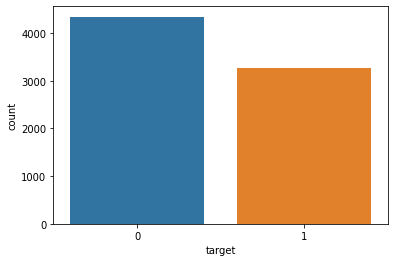

In [164]:
sns.countplot(data_train["target"])

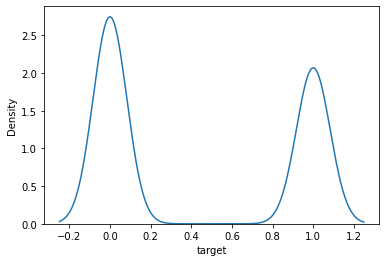

In [165]:
sns.kdeplot(x = "target", data = data_train)

# TRAIN AND TEST SPLIT

In [166]:
X = data_train["text"]
y = data_train["target"]

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [168]:
X_train

5001    13 reason love woman military lulgzimbestpicts...
1102    70 year ago hour usa bombed hiroshima therein ...
4544    believe blevins got injured falling curb somet...
5680                                skyrim awaits rescued
3839    new snap tool black baseball hat cap silver gr...
                              ...                        
6781    ûªt research collective memory 1st rule writin...
4362    governor allows parole school bus hijacker htt...
3374    elem pomo helping displaced rocky fire please ...
6573    hiroshima survivor fight nuclear industry braz...
5608    latest home razed northern california wildfire...
Name: text, Length: 6090, dtype: object

# IMPLEMENTING THE COUNT VECTORIZER

In [169]:
count_vectorizer = CountVectorizer(stop_words = 'english')

X_train_BOW = count_vectorizer.fit_transform(X_train).toarray()

In [170]:
X_test_BOW  = count_vectorizer.transform(X_test).toarray()

In [171]:
print(data_train.shape)

(7613, 2)


In [172]:
print(X_train_BOW)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [173]:
print(X_train_BOW.shape)

(6090, 17171)


In [174]:
print(X_test_BOW.shape)

(1523, 17171)


# Implementing the Naive Bayes Classfier

In [175]:
# Create and fit the random forest
rf = MultinomialNB()
rf.fit(X_train_BOW, y_train)

# Evaluate predictions
Y_pred = rf.predict(X_test_BOW)
acc_nb = round(rf.score(X_test_BOW, y_test) * 100, 2)
# Printing the Classification Report
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_nb)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 78.92
              precision    recall  f1-score   support

           0   0.797357  0.840883  0.818542       861
           1   0.777236  0.722054  0.748630       662

    accuracy                       0.789232      1523
   macro avg   0.787296  0.781469  0.783586      1523
weighted avg   0.788611  0.789232  0.788153      1523



Predicted,0,1,All
Actual,,,
0,724,137,861
1,184,478,662
All,908,615,1523


In [176]:
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(rf, files)

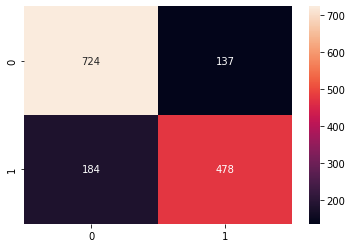

In [177]:
# confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

Naive Bayes Classifier: AUROC = 0.843


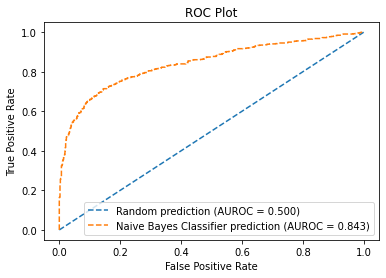

In [178]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test_BOW)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
r_auc = roc_auc_score(y_test, r_probs)
print('Naive Bayes Classifier: AUROC = %.3f' % (rf_auc))
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Naive Bayes Classifier prediction (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## *PREDICTION ON TEST DATASET*

In [234]:
data_test = pd.read_csv("nlp-getting-started/test.csv")

In [235]:
data_test_ = data_test['text']

In [236]:
X_data_test_BOW  = count_vectorizer.transform(data_test_).toarray()

In [237]:
X_data_test_BOW

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [238]:
prediction_test = rf.predict(X_data_test_BOW)

In [239]:
prediction_test

array([1, 1, 1, ..., 1, 1, 1])

In [263]:
prediction_test_ = pd.DataFrame(prediction_test)

In [264]:
prediction_test_

,0
0,1
1,1
2,1
3,0
4,1
...,...
3258,1
3259,1
3260,1
3261,1


In [265]:
prediction_test_.to_csv("predictions.csv")

In [261]:
data_submission = pd.read_csv("nlp-getting-started/sample_submission.csv")

In [262]:
data_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


# IMPLEMENTING THE TF-IDF

In [240]:
tf_idf_vectorizer = TfidfVectorizer(use_idf = True)

In [241]:
X_train_vectors_tfidf = tf_idf_vectorizer.fit_transform(X_train)

In [242]:
X_test_vectors_tfidf = tf_idf_vectorizer.transform(X_test)

In [243]:
print(X_train_vectors_tfidf.shape)

(6090, 17333)


In [244]:
print(X_test_vectors_tfidf.shape)

(1523, 17333)


# Implementing the Decision Tree Classifier

In [245]:
# Create and fit the random forest
rf = DecisionTreeClassifier()
rf.fit(X_train_vectors_tfidf, y_train)

# Evaluate predictions
Y_pred = rf.predict(X_test_vectors_tfidf)
acc_decision = round(rf.score(X_test_vectors_tfidf, y_test) * 100, 2)
# Printing the Classification Report
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 71.5
              precision    recall  f1-score   support

           0   0.732824  0.780488  0.755906       861
           1   0.688119  0.629909  0.657729       662

    accuracy                       0.715036      1523
   macro avg   0.710472  0.705199  0.706817      1523
weighted avg   0.713392  0.715036  0.713231      1523



Predicted,0,1,All
Actual,,,
0,672,189,861
1,245,417,662
All,917,606,1523


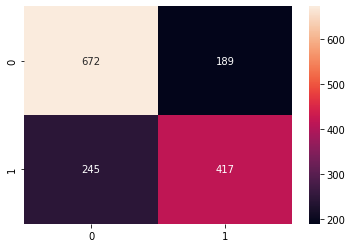

In [246]:
# confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

Decision Tree Classifier: AUROC = 0.710


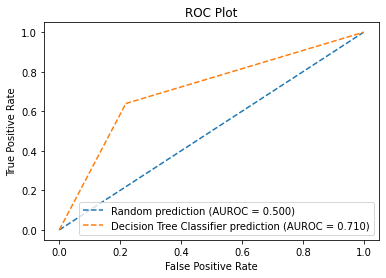

In [247]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test_vectors_tfidf)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
r_auc = roc_auc_score(y_test, r_probs)
print('Decision Tree Classifier: AUROC = %.3f' % (rf_auc))
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Decision Tree Classifier prediction (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# IMPLEMENTING TOKENIZER

In [248]:
## Tokenize the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(X_train)+ list(X_test))

In [249]:
vocab_size = len(tokenizer.word_index) + 1

In [250]:
print(len(tokenizer.word_index))

20328


In [251]:
print(tokenizer.word_index)

{'co': 1, 'http': 2, 'û': 3, 'fire': 4, 'like': 5, 'amp': 6, 'u': 7, 'get': 8, 'new': 9, 'via': 10, '2': 11, 'one': 12, 'people': 13, 'news': 14, 'year': 15, 'video': 16, 'time': 17, 'disaster': 18, 'emergency': 19, 'body': 20, 'day': 21, 'police': 22, 'home': 23, 'building': 24, 'would': 25, '3': 26, 'family': 27, 'say': 28, 'life': 29, 'still': 30, 'go': 31, 'storm': 32, 'crash': 33, 'back': 34, 'burning': 35, 'california': 36, 'bomb': 37, 'know': 38, 'look': 39, 'suicide': 40, '1': 41, 'world': 42, 'death': 43, 'man': 44, 'train': 45, 'flood': 46, 'car': 47, 'got': 48, 'rt': 49, 'see': 50, 'attack': 51, 'first': 52, 'love': 53, 'two': 54, 'nuclear': 55, 'going': 56, 'make': 57, 'let': 58, 'today': 59, 'war': 60, 'dead': 61, 'killed': 62, '5': 63, 'accident': 64, 'youtube': 65, '4': 66, 'want': 67, 'full': 68, 'gt': 69, 'woman': 70, 'hiroshima': 71, 'need': 72, 'old': 73, 'take': 74, 'weapon': 75, 'think': 76, 'good': 77, 'may': 78, 'way': 79, 'injury': 80, 'watch': 81, '2015': 82, '

In [252]:
# Now for each sentence a list is created and with respect to the word a unique number is assigned 
train_x = tokenizer.texts_to_sequences(X_train)
test_x = tokenizer.texts_to_sequences(X_test)

In [253]:
## Pad the sentences to have the same length 
train_x = pad_sequences(train_x, maxlen=150)
test_x = pad_sequences(test_x, maxlen= 150)

In [254]:
print(train_x.shape)

(6090, 150)


In [255]:
print(test_x.shape)

(1523, 150)


# IMPLEMENTING A CONVOLUTIONAL 1 D NEURAL NETWORK

In [256]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=80, input_length = train_x.shape[1]))
model.add(Conv1D(32,3,activation="relu"))
model.add(Conv1D(16,3,activation="relu"))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(3))
model.add(Dense(1, activation='sigmoid'))

In [257]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [258]:
history = model.fit(train_x, y_train, epochs=15, validation_data=(test_x, y_test))

Epoch 1/15
191/191 [==============================] - 8s 37ms/step - loss: 0.5635 - accuracy: 0.7011 - val_loss: 0.4828 - val_accuracy: 0.7827
Epoch 2/15
191/191 [==============================] - 7s 36ms/step - loss: 0.3069 - accuracy: 0.8755 - val_loss: 0.5172 - val_accuracy: 0.7656
Epoch 3/15
191/191 [==============================] - 7s 36ms/step - loss: 0.1031 - accuracy: 0.9635 - val_loss: 0.6489 - val_accuracy: 0.7544
Epoch 4/15
191/191 [==============================] - 7s 36ms/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.9324 - val_accuracy: 0.7065
Epoch 5/15
191/191 [==============================] - 10s 52ms/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.8532 - val_accuracy: 0.7505
Epoch 6/15
191/191 [==============================] - 9s 46ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.9596 - val_accuracy: 0.7439
Epoch 7/15
191/191 [==============================] - 12s 61ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.9735 - val_accuracy: 0.73

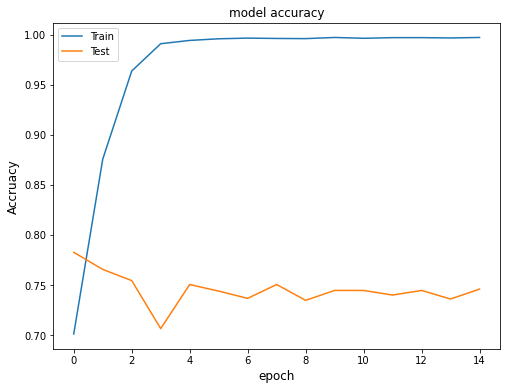

In [259]:
# summarize history for loss
plt.figure(figsize=(8, 6))


plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('Accruacy', fontsize = 12)

plt.xlabel('epoch', fontsize = 12)

plt.legend(['Train', "Test"], loc='upper left')

plt.show()

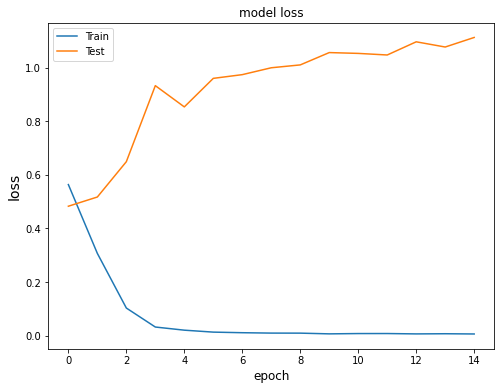

In [260]:
# summarize history for loss
plt.figure(figsize=(8, 6))

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss', fontsize = 14)

plt.xlabel('epoch', fontsize = 12)

plt.legend(['Train', "Test"], loc='upper left')
plt.show()